In [1]:
#lets us start by taking the pdf and convert them into images so that we can apply extraction on each image 



## lets us start by taking the pdf and convert them into images so that we can apply extraction on each image 



In [8]:
!pip install pdf2image


[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## This function takes pdf_file path return a output folder that contain all the images in the pdf 

In [11]:
import os
from pdf2image import convert_from_path

def convert_pdf_to_images(pdf_file, output_dir, poppler_path):
    # Create the output directory if it does not exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Store PDF with convert_from_path function
    images = convert_from_path(pdf_file, poppler_path=poppler_path)

    for i in range(len(images)):
        # Define the output file path
        output_file = os.path.join(output_dir, 'page' + str(i) + '.jpg')
        # Save pages as images in the pdf
        images[i].save(output_file, 'JPEG')

# Provide the path of the PDF file and the output directory
pdf_file = r'D:/nlp101/Last Name, First Name T1 Year Doc (1).pdf'
output_dir = r'D:/nlp101/ocr101/EasyOCR/output'
poppler_path = r"D:/nlp101/ocr101/EasyOCR/Release-24.02.0-0/poppler-24.02.0/Library/bin"

# Call the function to convert the PDF file into images
convert_pdf_to_images(pdf_file, output_dir, poppler_path)


## This function takes the filepath of the directory where are all images are placed and return a list that contain all the images name 

In [30]:
import os

def get_image_file_names(dir_path):
    # Create an empty list to store the file names
    file_names = []

    # Loop through the files in the directory
    for file in os.listdir(dir_path):
        # Check if the file is an image file (JPEG format)
        if file.endswith('.jpg'):
            # Add the file name to the list
            file_names.append(file)

    # Return the list of file names
    return file_names

# Define the directory path
dir_path = r'D:\nlp101\ocr101\EasyOCR\output'

# Call the function to get the list of image file names
image_file_names = get_image_file_names(dir_path)

# Print the list of file names
print(image_file_names)


['page0.jpg', 'page1.jpg', 'page2.jpg', 'page3.jpg', 'page4.jpg', 'page5.jpg', 'page6.jpg', 'page7.jpg', 'page8.jpg', 'page9.jpg']


## This function has two part it takes up an image and convet it into text and then use regular expersion to get the from type of each image 

In [19]:
import cv2
import pytesseract
import re

def determine_form_type_for_images(image_file_names):
    # Create an empty list to store the image names and their form types
    form_types = []

    # Loop through the image files in the list
    for image_file in image_file_names:
        # Extract text from the image
        page_text = extract_image_text(image_file)

        # Determine the form type
        form_type = determine_form_type(page_text)

        # Add the image name and its form type to the list
        form_types.append((image_file, form_type))

    # Return the list of image names and their form types
    return form_types

def extract_image_text(img_path):
    """
    Extracts text from an image.
    
    Args:
    img_path (str): The file path to the image.
    
    Returns:
    str: The text extracted from the image.
    """
    # Load the image
    img = cv2.imread(img_path)

    # Convert the image to RGB format
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    import pytesseract
    pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

    # Extract text from the image using Tesseract
    text = pytesseract.image_to_string(img)

    return text

def determine_form_type(page_text):
    """
    Determines the type of form based on specific patterns in the text.
    
    Args:
    page_text (str): The text extracted from the image.
    
    Returns:
    str: The form type if a pattern is matched, otherwise "Unknown".
    """
    # Define the pattern to match form types like Plan T4A (P), T4A (OAS), etc.
    patterns = [
        r'Plan T4A \(P\)',
        r'T4A \(\w+\)',
        r'T4RIF',
        r'T3',
        r'T5008',
        r'RECEIPT',
        r'T5008'
    ]

    # Search for the patterns in the text
    for pattern in patterns:
        match = re.search(pattern, page_text)
        if match:
            return match.group(0)

    return "Unknown"

# Define the list of image files
image_file_names = image_file_names

# Call the function to determine the form type for each image in the list
form_types = determine_form_type_for_images(image_file_names)

# Print the form types
print(form_types)


[('page0.jpg', 'Plan T4A (P)'), ('page1.jpg', 'T4A (OAS)'), ('page2.jpg', 'T4RIF'), ('page3.jpg', 'Unknown'), ('page4.jpg', 'T3'), ('page5.jpg', 'T5008'), ('page6.jpg', 'Unknown'), ('page7.jpg', 'Unknown'), ('page8.jpg', 'RECEIPT'), ('page9.jpg', 'T5008')]


## This is the function that print out the name of the image and the type of that image

In [31]:
import cv2
import pytesseract
import re

def determine_form_type_for_images(image_file_names):
    # Loop through the image files in the list
    for image_file in image_file_names:
        # Extract text from the image
        page_text = extract_image_text(image_file)

        # Determine the form type
        form_type = determine_form_type(page_text)

        # Print the image name and its corresponding form type
        print(f"The form type of {image_file} is {form_type}")

# Example usage
image_file_names = image_file_names
determine_form_type_for_images(image_file_names)


The form type of page0.jpg is Plan T4A (P)
The form type of page1.jpg is T4A (OAS)
The form type of page2.jpg is T4RIF
The form type of page3.jpg is Unknown
The form type of page4.jpg is T3
The form type of page5.jpg is T5008
The form type of page6.jpg is Unknown
The form type of page7.jpg is Unknown
The form type of page8.jpg is RECEIPT
The form type of page9.jpg is T5008


## this create the function seprate the know and unknow images 

In [36]:


unknown_images = [image_name for image_name, form_type in form_types if form_type == 'Unknown']
known_images = [image_name for image_name, form_type in form_types if form_type != 'Unknown']

print("Unknown images:")
print(unknown_images)
print("\nKnown images:")
print(known_images)


Unknown images:
['page3.jpg', 'page6.jpg', 'page7.jpg']

Known images:
['page0.jpg', 'page1.jpg', 'page2.jpg', 'page4.jpg', 'page5.jpg', 'page8.jpg', 'page9.jpg']


In [49]:
known_images

['page0.jpg',
 'page1.jpg',
 'page2.jpg',
 'page4.jpg',
 'page5.jpg',
 'page8.jpg',
 'page9.jpg']

In [57]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## croping the image part that was requierd for the analysis 

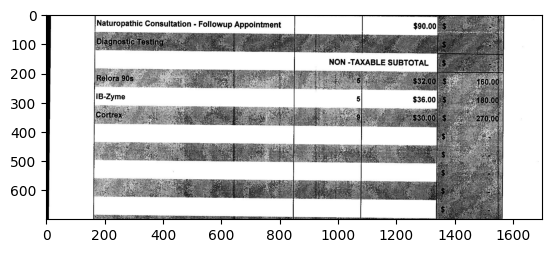

In [69]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image_path = known_images[5]
img = cv2.imread(image_path)

# Crop the image
cropped_img = img[700:1400, :]

# Display the cropped image
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.show()


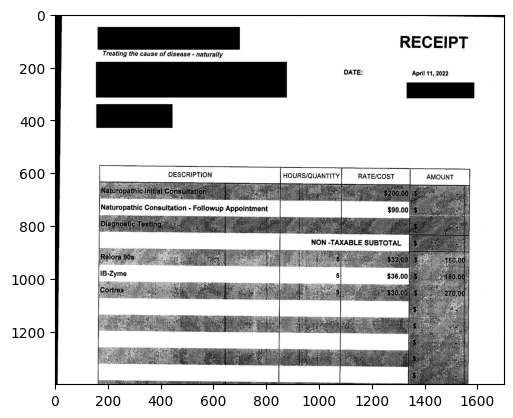

In [75]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image_path = known_images[5]
img = cv2.imread(image_path)

# Crop the image
cropped_img = img[0:1400, :]

# Display the cropped image
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.show()


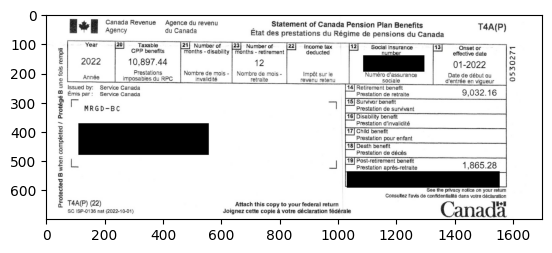

In [120]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image_path = known_images[0]

img = cv2.imread(image_path)

# Crop the image
cropped_img = img[700:1400, :]
# this is for Plan T4A (P),T3,T4RIF,T4A (OAS)

# Crop the image
# cropped_img = img[450:1850, :]
##this is for RECEIPT

# cropped_img = img[450:1070, :] 
#this is for the T5008

# Display the cropped image
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.show()


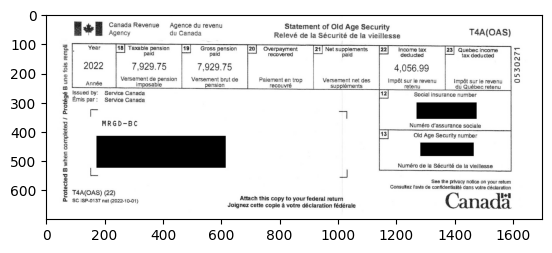

In [155]:
import cv2
import matplotlib.pyplot as plt
import base64
from PIL import Image
import io

# Read the image
image_path = known_images[1]

img = cv2.imread(image_path)

# Crop the image
cropped_img = img[700:1400, :]
# this is for Plan T4A (P),T3,T4RIF,T4A (OAS)

# Convert the cropped image to RGB format
cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)

# Convert the NumPy array to a PIL Image
pil_img = Image.fromarray(cropped_img)

# Function to encode an image to base64
def encode_image(image):
    buffered = io.BytesIO()
    image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

# Encode the image to base64
base64_image = encode_image(pil_img)

# Display the cropped image
plt.imshow(cropped_img)
plt.show()


In [156]:
cropped_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [170]:
contct = pytesseract.pytesseract.image_to_string(cropped_img)

## Using an Opean AI to extract all the key and value using the in json this is the wai i sent the image and get the resonse 

In [129]:
from openai import OpenAI
import os
import requests
from pdf2image import convert_from_bytes
from PIL import Image
import base64
from io import BytesIO


In [122]:
import getpass
OPENAI_API_KEY = getpass.getpass("Enter the Opeani key")


In [130]:
## seting the API Key and model name 
MODEL = "gpt-4o"
client = OpenAI(api_key=OPENAI_API_KEY)

In [136]:
im

'iVBORw0KGgoAAAANSUhEUgAABqQAAAK8CAIAAAAGeEmKAAEAAElEQVR4nOy9d3wU9fY+/p7tvW96pQSQhIB0UZpUpUi1IQoXEbA3bKB4BVRAAZUmVZogIgKCDRELRXovgYT0ZLO9z+zM7vz+eH7MK18FPvd6VRTm+SOvZLM7O/Ou5zzv55xDeBF/FWKxGM/z5BJ4nk8kEv/JByORSDAYFN7MMAx+CQaDL730UkpKCv7kOG748OHdunXjOI7juEQi4fP5eJ5fuHAhISQSifA8HwqF8Oba2lr8UlNTI5PJPvroI/wZj8eFnzzPBwIBnufbtWv38MMPC5/91Z07nc7S0lJCyIkTJ2ia9nq9wk0aDIbXX389HA7HYrHVq1dnZmbWv3+fz8dxHM/z4XD4t5cF+vXr169fPzwdy7J4oqVLlxJCnE4nz/Mej0cqlR49etTv9+MjLMuyLIsr45pXb2fhv3hqjuMoiqIoCn2EC9ZvkysB/cvzPJr68OHDhJDTp08nJye//fbbuAieneM4mqbPnz+PpzAaje+9955wnUWLFjVs2LD+BRmGcblcwhvwaG3bth0/fnw8Ho9Go7FYTHj834ff8bz/aNA0HYvFHA5HIpE4cuQIz/ORSGTIkCHDhg2r/+CRSARTgOd5t9sdCoU4jjMaja+99hpN0zzPR6NRnue3bt1KCKmrqxPmyK+GXPv27ceMGYOOu+w89fv9H3/8sdAF3bp1e+ihh4QBwLIswzCLFy9OTk4Wrnml9QS3xPP8008/nZWVdeDAAblcvn///mg0KvwLQ3T69Om33HLLsWPH5HL58ePHhStrtdqlS5cK34JBGwwGjUYjJiO+6O2338b9YIJHo1GWZXNych577DGhkVUq1apVq4TJeOedd959990rVqyw2Wzl5eW4vtDgDMMMHDjw2WeffffddymK4i8NdZZlccP4fciQIffcc08gEIjFYsFgMB6PC31UVFT0ww8/NGzY8MEHH9y/f/+

In [171]:
import base64
import requests
from io import BytesIO
from pdf2image import convert_from_bytes
from PIL import Image
import pandas as pd
import json


# Encode the image to base64
base64_image = base64_image

# Example usage with the API (modify according to your actual usage)
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in JSON format."},
        {"role": "user", "content": """
        summarieds the test
        f" {contct}" 
        
        """}
    ],
    temperature=0.0,

)

output = response.choices[0].message.content.lstrip('```json').rstrip('```')




In [173]:
contct

"Canada Revenue\nAgency\n\nhd |\n\nAgence du revenu\ndu Canada\n\nStatement of Cld Age Security\nRelevé de la Sécurité de Ia vieillesse\n\nT4A(OAS)\n\nYear [13] Taxable pension Gross pension 20} Overpayment 21) Net supplements Income tax 23) Quebec income\npaid paid recovered paid deducted tax deducted\n2022 7,929.75 7,929.75 4,056.99\nVersement de pension Versement brut de Paiement en trop Versement net des impét sur le revenu impét sur le revenu\nAnnée imposable pension recouvré L suppléments retenu j___du Québec retenu\n\nissued by: Service Canada\nEmis par: Service Canada\n\n-\nMRGD-BC\n\nL\n\nT4A(OAS) (22)\nSC ISP-0137 nat (2022-10-01)\n\nProtected 8 when completed / Protégé B une fois rempli\n\n=\n\n4\n\nAttach this copy to your federal return\nJoignez cette copie a votre déclaration fédérale\n\n12 Social insurance number\n\nNuméro d'assurance sociale\nOld Age Security number\n\nNuméro de la Sécurité de la vieillesse\n\n|\n\nSes the privacy notice on your retum\nConsukez avis de 

In [172]:
print(output)




{
  "error": "Invalid input. Please provide a valid text to summarize."
}



In [117]:
df = pd.DataFrame(json.loads(output))

In [118]:
df

,form_elements
0,"{'type': 'text', 'label': 'First Name', 'name'..."
1,"{'type': 'text', 'label': 'Last Name', 'name':..."
2,"{'type': 'email', 'label': 'Email', 'name': 'e..."
3,"{'type': 'password', 'label': 'Password', 'nam..."
4,"{'type': 'checkbox', 'label': 'Subscribe to ne..."
5,"{'type': 'radio', 'label': 'Gender', 'name': '..."
6,"{'type': 'select', 'label': 'Country', 'name':..."
7,"{'type': 'textarea', 'label': 'Comments', 'nam..."
8,"{'type': 'submit', 'label': 'Submit', 'name': ..."
